# Exercise P1.1:  Bayes theorem (pen and paper exercise)

Suppose you have a medical test for a disease. Two criteria are important to define the quality of such a test: 

- Sensitivity quantifies how often the test generates a positive test outcome for people with the disease. This is also called the true positive rate.
- Specificity quantifies how often the test generates a negative test outcome for people who don't have the disease. This is also called the true negative rate.

Relevant for the doctor and the tested person is the probability that a positively tested person has the disease. This probability is also called positive predictive value.

Please state sensitity, specificity and positive predictive value as conditional probabilities.


Another important quantity in testing is the prevalence of the disease, that is the proportion of the people in the population that have the disease.

- Please state the prevalence as a probability. 
- Please derive an equation for the positive predtice value as a function of the sensitity, specificity and the prevalence. This equation can be derived using Bayes theorem.

Compute the positive predictive value for a test with sensitivity of 0.99 and specificity of 0.95 and a disesase with prevalences of 0.5, 1/10 and 1/10000. Discuss the results. 

# Exercise P1.2:  Bayesian integration in sensorimotor learning

In this exercise, you perfrom a simulation of the Bayesian model used in Koerding and Wolpert (2004) (discussed in the lecture).

The script in the following cell computes the posterior distribution for a Gaussian prior and Gaussian likelihood. In the experiment of Koerding&Wolpert the prior distribution represents the prior of the subject about the lateral shift while the likelhiood represents the information about the lateral shift the subject obtains from the visual feedback. The code below produces plots of the prior, likelihood and posterior distributions and prints mean and standard deviation of all three distributions.


- Run the cell and revise the lectures in order to understand how the Bayesian model that is simulated relates to the experiments performed by Koerding & Wolpert (2004).
- Change the means and standard deviations of the prior and the visual feedback and systematically investigate their effect on the resulting posterior distribution. 
- Describe the effect of prior and visual feedback on the posterior distribution.

Prior: N(1.00,0.50)
Visual feedback: N(2.00,0.25)
Weights: w1=0.20, w2=0.80
Posterior: N(1.80,0.22)


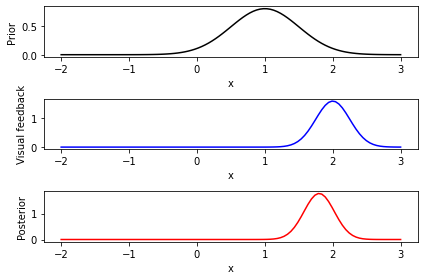

In [1]:
from matplotlib import pylab as plt
import numpy as np

# computing a gaussian distribution
def gaussian(x, mu, sig):
    return np.exp(-((x - mu)**2)/(2*sig**2)) / (np.sqrt(2*np.pi)*sig)

# computing a posterior for gaussian prior and likelihood
def computePosterior(mu_prior, sig_prior, mu_like, sig_like):
    w1=1/(sig_prior**2) / (1/(sig_prior**2) + 1/(sig_like**2))
    w2=1/(sig_like**2) / (1/(sig_prior**2) + 1/(sig_like**2))

    mu_posterior=w1*mu_prior + w2*mu_like
    sig_posterior=np.sqrt ( sig_prior**2 * sig_like**2 / (sig_prior**2 + sig_like**2) )
    
    return mu_posterior, sig_posterior, w1, w2



         
# parameters for the prior and the sensory feedback
mu_prior=1    # mean of prior
sig_prior=0.5   # std.dev. of prior

mu_vis=2      # mean of visual feedback
sig_vis=0.25   # std.dev of visual feedback


# computation of posterior
mu_posterior, sig_posterior, w1, w2 = computePosterior(mu_prior, sig_prior, mu_vis, sig_vis)


# print information about prior, feedback and posterior
print('Prior: N(%.2f,%.2f)' %(mu_prior, sig_prior))
print('Visual feedback: N(%.2f,%.2f)' %(mu_vis, sig_vis))
print('Weights: w1=%.2f, w2=%.2f' %(w1,w2))
print('Posterior: N(%.2f,%.2f)' %(mu_posterior, sig_posterior))


# plot prior, feedback and posterior
x=np.linspace(-2,3,100)
    
plt.figure()
plt.subplot(3,1,1)
plt.plot(x,gaussian(x,mu_prior,sig_prior),'k')
plt.xlabel('x')
plt.ylabel('Prior')
plt.subplot(3,1,2)
plt.plot(x,gaussian(x,mu_vis,sig_vis),'b')
plt.xlabel('x')
plt.ylabel('Visual feedback')
plt.subplot(3,1,3)
plt.plot(x,gaussian(x,mu_posterior,sig_posterior),'r')
plt.xlabel('x')
plt.ylabel('Posterior')
plt.tight_layout()


__TASK__: Change the means and standard deviations of the prior and the visual feedback and systematically investigate their effect on the resulting posterior distribution. 

Describe the effect of prior and visual feedback on the posterior distribution.

In [2]:
def compute_and_plot(mu_prior, sig_prior, mu_vis, sig_vis):

    # computation of posterior
    mu_posterior, sig_posterior, w1, w2 = computePosterior(mu_prior, sig_prior, mu_vis, sig_vis)


    # plot prior, feedback and posterior
    x=np.linspace(-2,3,100)

    plt.figure()
    plt.subplot(3,1,1)
    plt.plot(x,gaussian(x,mu_prior,sig_prior),'k')
    plt.xlabel('x')
    plt.ylabel('Prior')
    plt.subplot(3,1,2)
    plt.plot(x,gaussian(x,mu_vis,sig_vis),'b')
    plt.xlabel('x')
    plt.ylabel('Visual feedback')
    plt.subplot(3,1,3)
    plt.plot(x,gaussian(x,mu_posterior,sig_posterior),'r')
    plt.xlabel('x')
    plt.ylabel('Posterior')
    plt.suptitle('Prior ~ $N({},{})$, visual feedback ~ $N({},{})$'.format(mu_prior, sig_prior, mu_vis, sig_vis))
    plt.tight_layout()

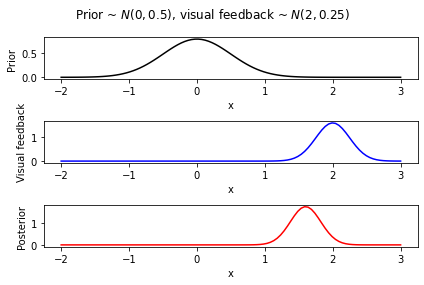

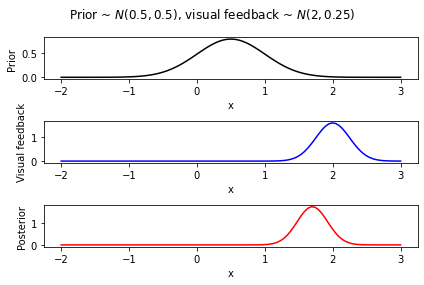

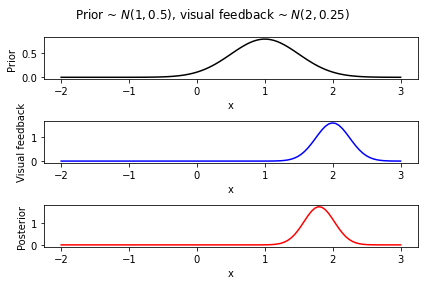

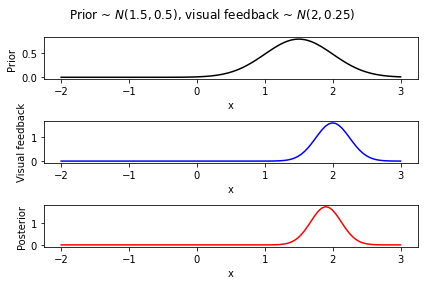

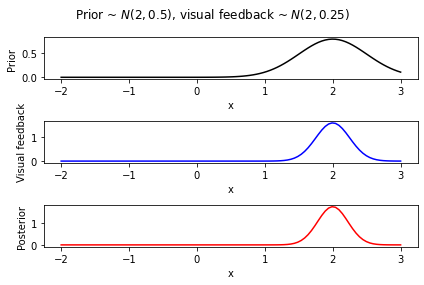

In [3]:
# effect of prior mean
means_prior = [0, 0.5, 1, 1.5, 2]

# parameters for the prior and the sensory feedback
sig_prior=0.5   # std.dev. of prior

mu_vis=2      # mean of visual feedback
sig_vis=0.25   # std.dev of visual feedback

for i in range(len(means_prior)):
    mu_prior=means_prior[i]    # mean of prior
    compute_and_plot(mu_prior, sig_prior, mu_vis, sig_vis)

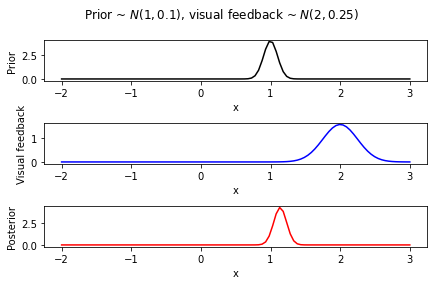

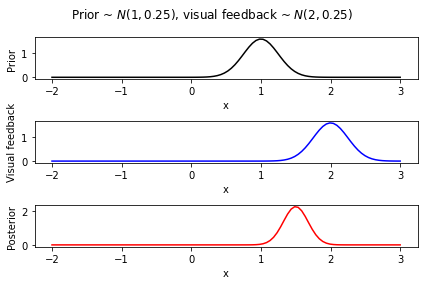

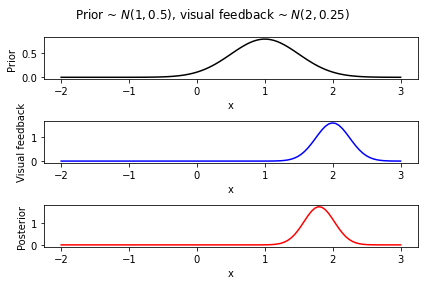

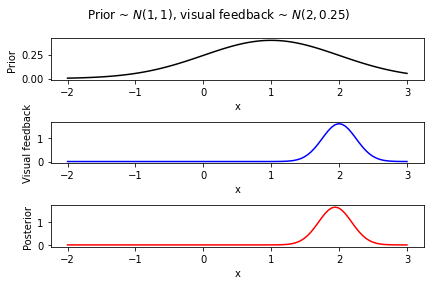

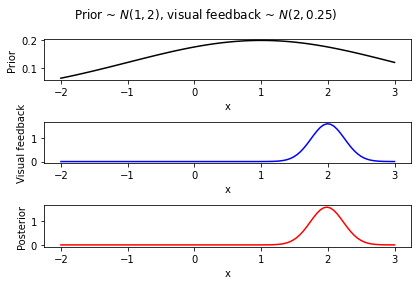

In [4]:
# effect of prior sd
sd_prior = [0.1, 0.25, 0.5, 1, 2]

# parameters for the prior and the sensory feedback
mu_prior=1    # mean of prior

mu_vis=2      # mean of visual feedback
sig_vis=0.25   # std.dev of visual feedback

for i in range(len(means_prior)):
    sig_prior=sd_prior[i]  # std.dev. of prior
    compute_and_plot(mu_prior, sig_prior, mu_vis, sig_vis)

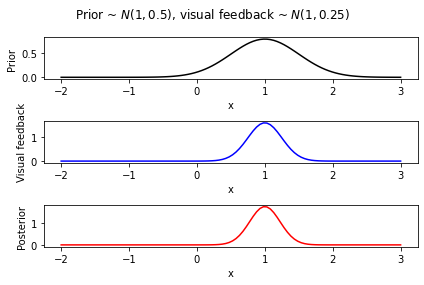

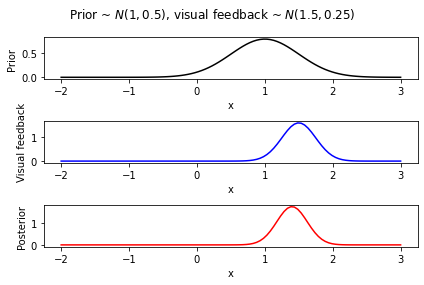

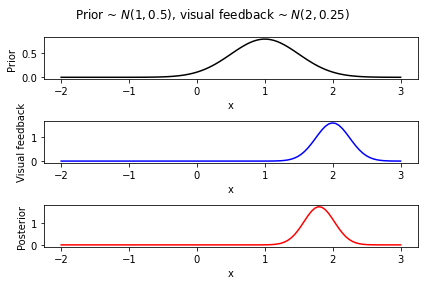

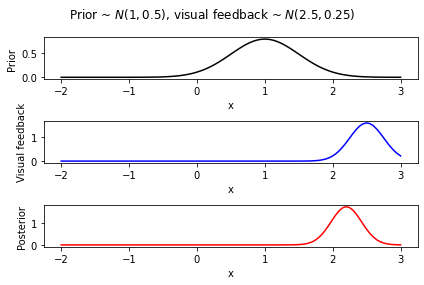

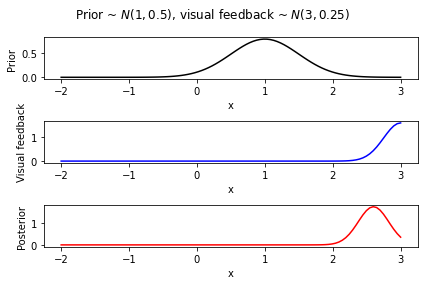

In [5]:
# effect of visual feedback mean
means_feedback = [1, 1.5, 2, 2.5, 3]

# parameters for the prior and the sensory feedback
mu_prior=1    # mean of prior
sig_prior=0.5   # std.dev. of prior

sig_vis=0.25   # std.dev of visual feedback

for i in range(len(means_prior)):
    mu_vis=means_feedback[i]    # mean of visual feedback
    compute_and_plot(mu_prior, sig_prior, mu_vis, sig_vis)

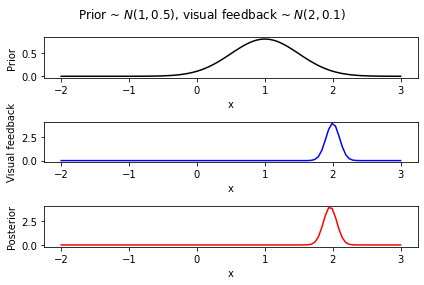

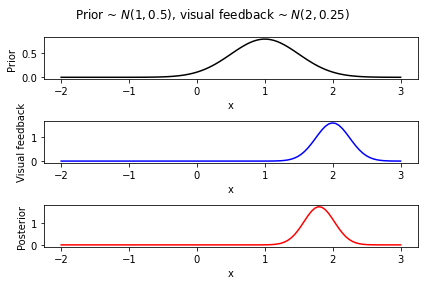

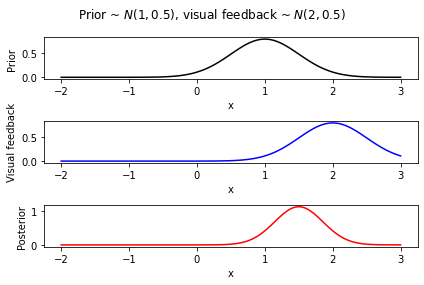

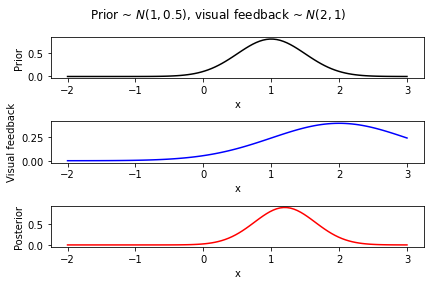

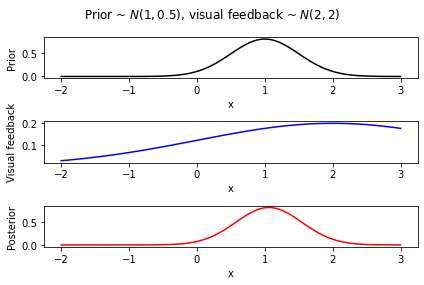

In [6]:
# effect of visual feedback sd
sd_feedback = [0.1, 0.25, 0.5, 1, 2]

# parameters for the prior and the sensory feedback
mu_prior=1    # mean of prior
sig_prior=0.5   # std.dev. of prior

mu_vis=2      # mean of visual feedback

for i in range(len(means_prior)):
    sig_vis=sd_feedback[i]    # std.dev of visual feedback
    compute_and_plot(mu_prior, sig_prior, mu_vis, sig_vis)

Next, use the function 'computePosterior' from the above cell to make a plot of the deviation from the target over the true lateral shifts for different values of the uncertainty of the visual feedback ('sig_vis'). Plot the average and the standard deviation of the deviation from the target. You can use the function 'errorbar' from matplotlib to plot the average together with error bars indicating the standard deviation. Discuss the results.

In [7]:
def compute_deviation_from_target(mu_prior, sig_prior, mus_vis, sigmas_vis):
    
    plt.figure()
    cmap = plt.get_cmap('viridis')
    colors = cmap(np.linspace(0, 1, len(mus_vis)))
    for i in range(len(sigmas_vis)):
        mu_deviations = np.zeros(len(mus_vis))
        sigmas_deviations = np.zeros(len(mus_vis))
        for j in range(len(mus_vis)):
            
            # computation of posterior
            mu_posterior, sig_posterior, w1, w2 = computePosterior(mu_prior, sig_prior, mus_vis[j], sigmas_vis[i])

            # computation of deviation
            mu_deviations[j] = mus_vis[j] - mu_posterior
            sigmas_deviations[j] = sigmas_vis[i] + sig_posterior
        
        plt.errorbar(mus_vis, mu_deviations, sigmas_deviations, label = 'visual uncertainty = {}'.format(sigmas_vis[i]), color = colors[i])
        plt.legend()

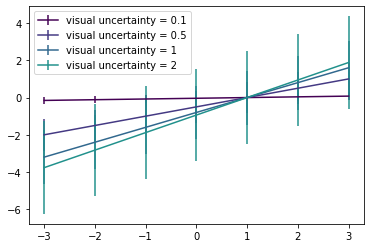

In [8]:
# parameters for the prior and the sensory feedback
mu_prior=1    # mean of prior
sig_prior=0.5   # std.dev. of prior

mus_vis=[-3, -2, -1, 0, 1, 2, 3] # mean of visual feedback
sigmas_vis=[0.1, 0.5, 1, 2] # std.dev of visual feedback

compute_deviation_from_target(mu_prior, sig_prior, mus_vis, sigmas_vis)

Finally, compare the Bayesian model to model 1 of Koerding&Wolpert in a quantiative way and resolve the following paradox (which is of course not a true paradox):

According to model 1 subjects fully compensate for the visual estimate of the lateral shift. This leads to an average deviation from the target which is 0 for all true lateral shifts (see lecture slides for details). In contrast, the Bayesian model does not always yield an average deviation of 0.

This may suggest that the Bayesian model has a larger error than model 1, however, this is not the case as the Bayesian model makes optimal use of the prior information and the visual feedback and therefore, should yield a minimal error. Can you explain why the Bayesian model has a smaller error than model 1 despite the Bayesian model having an average deviation from the target which is not always 0 in contrast to model 1?

Derive equations for the average squared error that subjects make according to model 1 and according to the Bayesian model. Can you use these equations to demonstrate that the Bayesian model has a smaller average squared error than model 1?
